In [1]:
import melt
import gezi
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import numpy as np
import pandas as pd
import sys, os
%matplotlib inline

tensorflow_version: 1.14.0
torch_version: 1.2.0
W0906 14:54:34.963110 140027074484032 deprecation_wrapper.py:119] From /search/odin/chenghuige/mine/pikachu/utils/melt/training/bert/optimization.py:79: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 14:54:36.282029 140027074484032 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Using TensorFlow backend.
W0906 14:54:36.342601 140027074484032 deprecation_wrapper.py:119] From /search/odin/chenghuige/mine/pikachu/utils/melt/util.py:301: The name tf.train.GradientDescentOptimizer is deprecated. Please use tf.compat.v1.train.GradientDescentOptimizer instead.

W09

In [2]:
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
os.path.dirname(os.getcwd())

'/search/odin/chenghuige/mine/pikachu/projects/feed/rank/src'

In [14]:
import evaluate

In [15]:
file = '/home/gezi/new/temp/feed/rank/zjx_data_2/jiexin.csv'

In [16]:
df = pd.read_csv(file)

In [17]:
df.head()

,uid,docid,label,duration,pred
0,a8a6A100005413C023,19825n0l0pVsea,0,0,0.0935
1,0b76865334032124734,20190831A0JX0N00,0,0,0.0371
2,9323868652045248597,20190827A0S5Z100,0,0,0.0871
3,ef65869497037554670,open_doc_prod9818013,0,0,0.0903
4,cd9f868808026771490,20190328A0QTZT00,0,0,0.0014


In [18]:
df['id'] = df['uid'] + '\t' + df['docid']

In [19]:
info = {'id': df['id'].values, 'duration': df['duration'].values}

In [20]:
df.head()

,uid,docid,label,duration,pred,id
0,a8a6A100005413C023,19825n0l0pVsea,0,0,0.0935,a8a6A100005413C023\t19825n0l0pVsea
1,0b76865334032124734,20190831A0JX0N00,0,0,0.0371,0b76865334032124734\t20190831A0JX0N00
2,9323868652045248597,20190827A0S5Z100,0,0,0.0871,9323868652045248597\t20190827A0S5Z100
3,ef65869497037554670,open_doc_prod9818013,0,0,0.0903,ef65869497037554670\topen_doc_prod9818013
4,cd9f868808026771490,20190328A0QTZT00,0,0,0.0014,cd9f868808026771490\t20190328A0QTZT00


In [47]:
len(df)

50000

In [21]:
evaluate.evaluate_rank(df.label.values, df.pred.values, info, group=False)

auc 0.7628206884115875 loss 0.7267389515742603
concordant 0.7491844013611879 concordant_click 0.5268365868194409


inverse_ratio start
inverse_ratio duration: 0.014130592346191406
------------weighted_inv: 20.29611723331122
------------weighted_inv_click: 32.80821589047769


{'loss': 0.7267389515742603,
 'auc': 0.7628206884115875,
 'mse': 1.826887453857927,
 'mae': 0.5247791343032827,
 'concordant': 0.7491844013611879,
 'concordant_click': 0.5268365868194409,
 'weighted_inv': 20.29611723331122,
 'weighted_inv_click': 32.80821589047769}

In [22]:
file2 = '/home/gezi/new/temp/feed/rank/zjx_data_2/model/v8/dense.l2/model.ckpt-2.00-90873.valid'

In [49]:
file2 = '/home/gezi/new/temp/feed/rank/zjx_data_2/model/v8/dense.nofield/model.ckpt-2.00-90873.valid'

In [50]:
df2 = pd.read_csv(file2)

In [51]:
df2.head()

,uid,docid,label,duration,predict,prob
0,5aef868600035726239,open_doc_prod9783179,0.0,0,-2.270894,0.093562
1,649eA10000456B5E04,20190901A0CSG800,0.0,0,-2.255128,0.094908
2,a550867067048221536,19828n0x13ph3n,0.0,0,-2.283258,0.092519
3,ac29862262033914576,open_doc_prod9863643,0.0,0,-0.619905,0.349803
4,322f867300036509186,19828m0l0Xiz6g,1.0,59,-2.246098,0.095687


In [56]:
df2['id'] = df2['uid'] + '\t' + df2['docid']

In [57]:
info2 = {'id': df2['id'].values, 'duration': df2['duration'].values}

In [58]:
len(df2)

3324327

In [55]:
evaluate.evaluate_rank(df2.label.values, df2.predict.values, info2, group=False)

auc 0.7577460659920476 loss 0.3017677077416396


inverse_ratio start
inverse_ratio duration: 1.9351744651794434


concordant 0.7443631239524712 concordant_click 0.5234986820389574


------------weighted_inv: 20.751076311169957
------------weighted_inv_click: 32.61907848116685


{'loss': 0.3017677077416396,
 'auc': 0.7577460659920476,
 'mse': 13.554857856806983,
 'mae': 3.245942932649589,
 'concordant': 0.7443631239524712,
 'concordant_click': 0.5234986820389574,
 'weighted_inv': 20.751076311169957,
 'weighted_inv_click': 32.61907848116685}

In [80]:
df3 = df2.sample(50000)

In [81]:
info3 = {'id': df3['id'].values, 'duration': df3['duration'].values}
evaluate.evaluate_rank(df3.label.values, df3.predict.values, info3, group=False)

auc 0.7651855287531732 loss 0.3008544316328771
concordant 0.7512304427383221 concordant_click 0.5240227620100859


inverse_ratio start
inverse_ratio duration: 0.017309904098510742
------------weighted_inv: 20.340090857216804
------------weighted_inv_click: 31.85817446719993


{'loss': 0.3008544316328771,
 'auc': 0.7651855287531732,
 'mse': 13.57754126716095,
 'mae': 3.2495546367531176,
 'concordant': 0.7512304427383221,
 'concordant_click': 0.5240227620100859,
 'weighted_inv': 20.340090857216804,
 'weighted_inv_click': 31.85817446719993}

In [59]:
ids = set(df.id.values)

In [60]:
df3 = df2[df2['id'].isin(ids)]

In [61]:
info3 = {'id': df3['id'].values, 'duration': df3['duration'].values}

In [62]:
evaluate.evaluate_rank(df3.label.values, df3.predict.values, info3, group=False)

auc 0.7601011695300801 loss 0.30386889893204794
concordant 0.746483071514253 concordant_click 0.5254530568770661


inverse_ratio start
inverse_ratio duration: 0.0174105167388916
------------weighted_inv: 20.474541981129107
------------weighted_inv_click: 32.97676590912123


{'loss': 0.30386889893204794,
 'auc': 0.7601011695300801,
 'mse': 13.553468173558437,
 'mae': 3.2481360592112254,
 'concordant': 0.746483071514253,
 'concordant_click': 0.5254530568770661,
 'weighted_inv': 20.474541981129107,
 'weighted_inv_click': 32.97676590912123}

In [5]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.weight2/model.ckpt-8.00-62148.valid'

In [6]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9.v0/deep.fm.multi.jump.uniform.weight/model.ckpt-1.00-62147.valid'

In [7]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.normal.weight/model.ckpt-1.00-62147.valid'

In [8]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.uniform/model.ckpt-1.00-62147.valid'

In [9]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.mse.uniform.weight/model.ckpt-1.00-62147.valid'

In [10]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.uniform.weight.sigmoid/model.ckpt-1.00-62147.valid'

In [11]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.uniform.weight.mse/model.ckpt-1.00-62147.valid'

In [12]:
#file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.uniform.weight.dense.mse/model.ckpt-1.00-62147.valid'

In [13]:
file_ = '/home/gezi/new/temp/feed/rank/portrait/model/v9/deep.fm.multi.jump.uniform.weight2/epoch/model.ckpt-1.00-62146.valid'

In [14]:
df = pd.read_csv(file_)

In [15]:
df.head()

,uid,docid,label,duration,predict,prob,y_click,y_dur
0,3a38860871034898125,1972690l0DyLat,0.0,0,-3.456410,0.030578,-2.049590,-1.004743
1,074f355905076108449,open_doc_prod8057845,0.0,0,-3.511297,0.028993,-2.292529,-0.772139
2,3565860525049605335,19729f0x1xvg70,0.0,0,-7.565335,0.000518,-5.821646,-1.548513
3,3ca2863906036089252,19730b0x28sf3c,0.0,0,-2.049970,0.114055,-1.522104,0.560812
4,47d2862734030561816,open_doc_prod8444159,0.0,0,-6.005404,0.002459,-5.638172,0.816112


In [8]:
df['id'] = df['uid'] + '\t' + df['docid']

In [9]:
info = {'id': df['id'].values, 'duration': df['duration'].values}

In [ ]:
evaluate.evaluate_rank(df.label.values, df.p.values, info, group=False)

In [16]:
import tensorflow as tf

In [17]:
df.y_dur.max()

4.279360771179198

/home/gezi/env/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


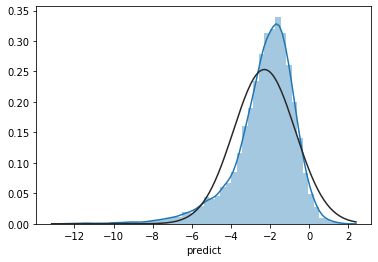

In [18]:
sns.distplot(df.predict[:10000], fit=norm)

/home/gezi/env/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


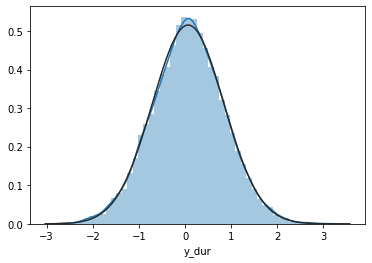

In [19]:
sns.distplot(df.y_dur[:10000], fit=norm)

/home/gezi/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([   5.,   28.,   63.,  147.,  283.,  542.,  832., 1138., 1440.,
        1584., 1356., 1061.,  732.,  415.,  207.,  108.,   38.,   11.,
           7.,    3.]),
 array([-2.66186547, -2.36881917, -2.07577286, -1.78272655, -1.48968024,
        -1.19663393, -0.90358763, -0.61054132, -0.31749501, -0.0244487 ,
         0.2685976 ,  0.56164391,  0.85469022,  1.14773653,  1.44078283,
         1.73382914,  2.02687545,  2.31992176,  2.61296806,  2.90601437,
         3.19906068]),
 <a list of 20 Patch objects>)

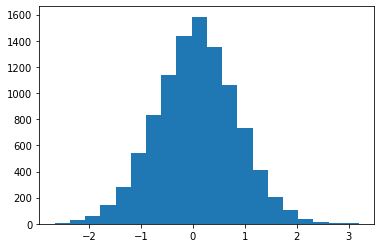

In [20]:
plt.hist(df.y_dur[:10000], normed=False, bins=20)

In [21]:
df['id'] = df['uid'] + '\t' + df['docid']

In [22]:
df.head()

,uid,docid,label,duration,predict,prob,y_click,y_dur,id
0,3a38860871034898125,1972690l0DyLat,0.0,0,-3.456410,0.030578,-2.049590,-1.004743,3a38860871034898125\t1972690l0DyLat
1,074f355905076108449,open_doc_prod8057845,0.0,0,-3.511297,0.028993,-2.292529,-0.772139,074f355905076108449\topen_doc_prod8057845
2,3565860525049605335,19729f0x1xvg70,0.0,0,-7.565335,0.000518,-5.821646,-1.548513,3565860525049605335\t19729f0x1xvg70
3,3ca2863906036089252,19730b0x28sf3c,0.0,0,-2.049970,0.114055,-1.522104,0.560812,3ca2863906036089252\t19730b0x28sf3c
4,47d2862734030561816,open_doc_prod8444159,0.0,0,-6.005404,0.002459,-5.638172,0.816112,47d2862734030561816\topen_doc_prod8444159


In [23]:
info = {'id': df['id'].values, 'duration': df['duration'].values}

In [24]:
evaluate.evaluate_rank(df.label.values, df.predict.values, info, group=False)

auc 0.7589877933054339 loss 0.3113555332406727
concordant 0.751459821264738 concordant_click 0.6284417238182604 kendall 0.22911266208554187 kendall_click 0.2558171605899607


{'loss': 0.3113555332406727,
 'auc': 0.7589877933054339,
 'mse': 10.616281699872465,
 'mae': 2.736259741342942,
 'kendall': 0.22911266208554187,
 'concordant': 0.751459821264738,
 'concordant_click': 0.6284417238182604}

In [25]:
evaluate.evaluate_rank(df.label.values, df.y_click.values, info, group=False)

auc 0.7866247026063328 loss 0.39715201371447945
concordant 0.7728223436415884 concordant_click 0.5472717778605367 kendall 0.24857670675409035 kendall_click 0.09415112015513051


{'loss': 0.39715201371447945,
 'auc': 0.7866247026063328,
 'mse': 6.285965594776136,
 'mae': 1.9129023761683548,
 'kendall': 0.24857670675409035,
 'concordant': 0.7728223436415884,
 'concordant_click': 0.5472717778605367}

In [26]:
evaluate.evaluate_rank(df.label.values, df.y_dur.values, info, group=False)

auc 0.5521689694057385 loss 0.7801365313440894
concordant 0.5606655045319255 concordant_click 0.6995111417061246 kendall 0.055274179584736814 kendall_click 0.39736600361506985


{'loss': 0.7801365313440894,
 'auc': 0.5521689694057385,
 'mse': 2.336760934131722,
 'mae': 0.9882121343626218,
 'kendall': 0.055274179584736814,
 'concordant': 0.5606655045319255,
 'concordant_click': 0.6995111417061246}

In [27]:
evaluate.evaluate_rank(df.label.values, df.y_dur.values + df.y_click.values, info, group=False)

auc 0.7473655864246718 loss 0.4807251492020307
concordant 0.7407858660892824 concordant_click 0.6332637214370853 kendall 0.2193873014596687 kendall_click 0.26542113108250226


{'loss': 0.4807251492020307,
 'auc': 0.7473655864246718,
 'mse': 7.035590665708124,
 'mae': 2.021829860153883,
 'kendall': 0.2193873014596687,
 'concordant': 0.7407858660892824,
 'concordant_click': 0.6332637214370853}

In [28]:
evaluate.evaluate_rank(df.label.values, gezi.sigmoid(df.y_dur.values) + gezi.sigmoid(df.y_click.values), info, group=False)

auc 0.7349060942032413 loss 1.0667483923910532
concordant 0.729226005464538 concordant_click 0.6364051518673304 kendall 0.20885476226010669 kendall_click 0.2716779132858271


{'loss': 1.0667483923910532,
 'auc': 0.7349060942032413,
 'mse': 1.7517505140604617,
 'mae': 1.0350922905554323,
 'kendall': 0.20885476226010669,
 'concordant': 0.729226005464538,
 'concordant_click': 0.6364051518673304}

In [29]:
len(df.y_dur.values)

4544790

In [30]:
gezi.sigmoid(3)

0.9525741268224334

In [32]:
df['prob_click'] = gezi.sigmoid(df.y_click)
df['prob_dur'] = gezi.sigmoid(df.y_dur)

In [43]:
def merge(prob_click, prob_dur, ratio=0.5):
  if prob_click < ratio:
    return prob_click 
  else:
    return 1 + prob_dur

In [44]:
y_ = np.asarray([merge(click, dur, 0.5) for click, dur in zip(df.prob_click.values, df.prob_dur.values)])
evaluate.evaluate_rank(df.label.values, y_, info, group=False)

auc 0.778361314216931 loss 0.8618963863176179
concordant 0.7672749774147276 concordant_click 0.586108142348458 kendall 0.2435223333931581 kendall_click 0.1715014420489581


{'loss': 0.8618963863176179,
 'auc': 0.778361314216931,
 'mse': 1.602230283995894,
 'mae': 0.6953378475879514,
 'kendall': 0.2435223333931581,
 'concordant': 0.7672749774147276,
 'concordant_click': 0.586108142348458}

In [45]:
y_ = np.asarray([merge(click, dur, 0.6) for click, dur in zip(df.prob_click.values, df.prob_dur.values)])
evaluate.evaluate_rank(df.label.values, y_, info, group=False)

auc 0.7839682132295241 loss 0.8248731035214061
concordant 0.7713750707589675 concordant_click 0.5655848546396833 kendall 0.2472580527866169 kendall_click 0.13062524456320065


{'loss': 0.8248731035214061,
 'auc': 0.7839682132295241,
 'mse': 1.5895940397892212,
 'mae': 0.6560529574862002,
 'kendall': 0.2472580527866169,
 'concordant': 0.7713750707589675,
 'concordant_click': 0.5655848546396833}

In [46]:
y_ = np.asarray([merge(click, dur, 0.7) for click, dur in zip(df.prob_click.values, df.prob_dur.values)])
evaluate.evaluate_rank(df.label.values, y_, info, group=False)

auc 0.7859805631255936 loss 0.8061873128860891
concordant 0.7726148410238717 concordant_click 0.5541995558701994 kendall 0.24838764499211188 kendall_click 0.10794916413779912


{'loss': 0.8061873128860891,
 'auc': 0.7859805631255936,
 'mse': 1.6046565882293937,
 'mae': 0.6396100103708581,
 'kendall': 0.24838764499211188,
 'concordant': 0.7726148410238717,
 'concordant_click': 0.5541995558701994}

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

In [40]:
bin_normer = KBinsDiscretizer(n_bins=[1000], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, gezi.sigmoid(df.y_dur.values) + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.5205651213358803 loss 30.146913441358805
concordant 0.7728244018125635 concordant_click 0.5476904012374602 kendall 0.2485785827968434 kendall_click 0.0949848925375954


{'loss': 30.146913441358805,
 'auc': 0.5205651213358803,
 'mse': 332677.6618395721,
 'mae': 499.55809282179627,
 'kendall': 0.2485785827968434,
 'concordant': 0.7728244018125635,
 'concordant_click': 0.5476904012374602}

In [41]:
bin_normer = KBinsDiscretizer(n_bins=[100], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, gezi.sigmoid(df.y_dur.values) + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.6711615125250818 loss 24.854771896278155
concordant 0.7727771269279522 concordant_click 0.5513744513562849 kendall 0.2485355091920786 kendall_click 0.10232240899088835


{'loss': 24.854771896278155,
 'auc': 0.6711615125250818,
 'mse': 3269.277695544533,
 'mae': 49.55590875662985,
 'kendall': 0.2485355091920786,
 'concordant': 0.7727771269279522,
 'concordant_click': 0.5513744513562849}

In [42]:
bin_normer = KBinsDiscretizer(n_bins=[50], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, gezi.sigmoid(df.y_dur.values) + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7653682318673358 loss 19.195413135534572
concordant 0.7726076791527348 concordant_click 0.5553312701010042 kendall 0.24838112016198427 kendall_click 0.11020319825142152


{'loss': 19.195413135534572,
 'auc': 0.7653682318673358,
 'mse': 802.2504726651512,
 'mae': 24.55629905268359,
 'kendall': 0.24838112016198427,
 'concordant': 0.7726076791527348,
 'concordant_click': 0.5553312701010042}

In [48]:
bin_normer = KBinsDiscretizer(n_bins=[20], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, gezi.sigmoid(df.y_dur.values) + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.784028311206599 loss 8.39925622855888
concordant 0.7714902372271576 concordant_click 0.566599995349302 kendall 0.24736298487896657 kendall_click 0.1326470994171132


{'loss': 8.39925622855888,
 'auc': 0.784028311206599,
 'mse': 122.04974989966395,
 'mae': 9.56139614529462,
 'kendall': 0.24736298487896657,
 'concordant': 0.7714902372271576,
 'concordant_click': 0.566599995349302}

In [47]:
bin_normer = KBinsDiscretizer(n_bins=[10], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, gezi.sigmoid(df.y_dur.values) + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7793519207840514 loss 4.272253247470751
concordant 0.7680580258770465 concordant_click 0.5834994620985521 kendall 0.2442357929552702 kendall_click 0.16630573892223857


{'loss': 4.272253247470751,
 'auc': 0.7793519207840514,
 'mse': 28.663862078644275,
 'mae': 4.5840491998732915,
 'kendall': 0.2442357929552702,
 'concordant': 0.7680580258770465,
 'concordant_click': 0.5834994620985521}

In [50]:
bin_normer = KBinsDiscretizer(n_bins=[20], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
ratio = 0.5
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * ratio + df.prob_click.values * (1. - ratio)  + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7844395479837929 loss 8.29223777546701
concordant 0.7718130135179407 concordant_click 0.5654772041734224 kendall 0.2476570762660483 kendall_click 0.13041083825724556


{'loss': 8.29223777546701,
 'auc': 0.7844395479837929,
 'mse': 120.62356956305436,
 'mae': 9.444308955356428,
 'kendall': 0.2476570762660483,
 'concordant': 0.7718130135179407,
 'concordant_click': 0.5654772041734224}

In [51]:
bin_normer = KBinsDiscretizer(n_bins=[20], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
ratio = 0.1
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * ratio + df.prob_click.values * (1. - ratio)  + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7855137033416968 loss 8.207618228767215
concordant 0.7722929641958104 concordant_click 0.5562469919705126 kendall 0.2480943738777216 kendall_click 0.11202704001983843


{'loss': 8.207618228767215,
 'auc': 0.7855137033416968,
 'mse': 119.52211965394042,
 'mae': 9.350717238374138,
 'kendall': 0.2480943738777216,
 'concordant': 0.7722929641958104,
 'concordant_click': 0.5562469919705126}

In [55]:
bin_normer = KBinsDiscretizer(n_bins=[10], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
ratio = 0.9
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * ratio + df.prob_click.values * (1. - ratio)  + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7796046461077377 loss 4.252066425553196
concordant 0.7682908800702195 concordant_click 0.5834076028344293 kendall 0.24444795371304032 kendall_click 0.16612278334083921


{'loss': 4.252066425553196,
 'auc': 0.7796046461077377,
 'mse': 28.519595760025407,
 'mae': 4.561209578423979,
 'kendall': 0.24444795371304032,
 'concordant': 0.7682908800702195,
 'concordant_click': 0.5834076028344293}

In [57]:
bin_normer = KBinsDiscretizer(n_bins=[10], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * df.prob_click.values + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7813552211633537 loss 3.9736520418151526
concordant 0.7697492013704991 concordant_click 0.5800900756819389 kendall 0.24577667445679488 kendall_click 0.15951527004886135


{'loss': 3.9736520418151526,
 'auc': 0.7813552211633537,
 'mse': 25.82013479098545,
 'mae': 4.231122894409369,
 'kendall': 0.24577667445679488,
 'concordant': 0.7697492013704991,
 'concordant_click': 0.5800900756819389}

In [58]:
bin_normer = KBinsDiscretizer(n_bins=[20], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * df.prob_click.values + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7844106450147887 loss 8.083368975933613
concordant 0.7718044168731852 concordant_click 0.5658004419642064 kendall 0.24764924360241566 kendall_click 0.13105463042559973


{'loss': 8.083368975933613,
 'auc': 0.7844106450147887,
 'mse': 116.00547953228737,
 'mae': 9.200420872867866,
 'kendall': 0.24764924360241566,
 'concordant': 0.7718044168731852,
 'concordant_click': 0.5658004419642064}

In [61]:
bin_normer = KBinsDiscretizer(n_bins=[25], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * df.prob_click.values + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7849897476942238 loss 10.156116187597084
concordant 0.7721603901773497 concordant_click 0.5625101541174758 kendall 0.24797358167069705 kendall_click 0.12450136961343537


{'loss': 10.156116187597084,
 'auc': 0.7849897476942238,
 'mse': 186.10172318512952,
 'mae': 11.697175344892681,
 'kendall': 0.24797358167069705,
 'concordant': 0.7721603901773497,
 'concordant_click': 0.5625101541174758}

In [62]:
bin_normer = KBinsDiscretizer(n_bins=[25], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
ratio = 0.5
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * ratio + df.prob_click.values * (1. - ratio)  + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7850134242799782 loss 10.367013368194478
concordant 0.7721703897498708 concordant_click 0.5622966535914049 kendall 0.24798269258434485 kendall_click 0.12407614097203618


{'loss': 10.367013368194478,
 'auc': 0.7850134242799782,
 'mse': 191.95666903307793,
 'mae': 11.941566012135464,
 'kendall': 0.24798269258434485,
 'concordant': 0.7721703897498708,
 'concordant_click': 0.5622966535914049}

In [63]:
bin_normer = KBinsDiscretizer(n_bins=[25], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
ratio = 1.
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * ratio + df.prob_click.values * (1. - ratio)  + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7847756545835993 loss 10.475553209748675
concordant 0.7719865426395466 concordant_click 0.5629939769097929 kendall 0.24781518380651357 kendall_click 0.1254649985374485


{'loss': 10.475553209748675,
 'auc': 0.7847756545835993,
 'mse': 193.74709237235703,
 'mae': 12.059016105966124,
 'kendall': 0.24781518380651357,
 'concordant': 0.7719865426395466,
 'concordant_click': 0.5629939769097929}

In [59]:
bin_normer = KBinsDiscretizer(n_bins=[30], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * df.prob_click.values + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7853275322870221 loss 12.233053325399128
concordant 0.7723445024141801 concordant_click 0.5601831232877057 kendall 0.24814133191079066 kendall_click 0.11986662619407668


{'loss': 12.233053325399128,
 'auc': 0.7853275322870221,
 'mse': 272.86646747190554,
 'mae': 14.19551160094067,
 'kendall': 0.24814133191079066,
 'concordant': 0.7723445024141801,
 'concordant_click': 0.5601831232877057}

In [65]:
bin_normer = KBinsDiscretizer(n_bins=[5], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * df.prob_click.values + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7752040712914503 loss 2.00250142482486
concordant 0.7650949441703501 concordant_click 0.5998972066579877 kendall 0.24153603963412468 kendall_click 0.1989650997516705


{'loss': 2.00250142482486,
 'auc': 0.7752040712914503,
 'mse': 5.744196944397191,
 'mae': 1.890728987610697,
 'kendall': 0.24153603963412468,
 'concordant': 0.7650949441703501,
 'concordant_click': 0.5998972066579877}

In [67]:
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * df.prob_click.values, info, group=False)

auc 0.7589877914933539 loss 0.7456029050862971
concordant 0.7514598098887836 concordant_click 0.6284417179989301 kendall 0.22911265545923548 kendall_click 0.25581715534274807


{'loss': 0.7456029050862971,
 'auc': 0.7589877914933539,
 'mse': 1.7756982955009555,
 'mae': 0.556758395125195,
 'kendall': 0.22911265545923548,
 'concordant': 0.7514598098887836,
 'concordant_click': 0.6284417179989301}

In [60]:
bin_normer = KBinsDiscretizer(n_bins=[40], encode='ordinal')
bin_normer.fit_transform(df.y_click.values.reshape(-1, 1))
evaluate.evaluate_rank(df.label.values, df.prob_dur.values * df.prob_click.values + bin_normer.fit_transform(df.y_click.values.reshape(-1, 1)).reshape(-1), info, group=False)

auc 0.7843489148648479 loss 16.179097205704586
concordant 0.7725381455943379 concordant_click 0.5571127931881439 kendall 0.2483177660822678 kendall_click 0.11375145485979374


{'loss': 16.179097205704586,
 'auc': 0.7843489148648479,
 'mse': 496.3984998826806,
 'mae': 19.19398631236641,
 'kendall': 0.2483177660822678,
 'concordant': 0.7725381455943379,
 'concordant_click': 0.5571127931881439}

In [ ]:
df['prob_click'] = gezi.sigmoid(df['y_click'])

In [ ]:
df['prob_dur'] = gezi.sigmoid(df['y_dur'])

In [ ]:
df[df.label > 0]

In [ ]:
df